<a href="https://colab.research.google.com/github/HiroByteBit/ACT-4/blob/main/FINAL_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.53 MiB | 13.89 MiB/s, done.
Resolving deltas: 100% (11988/11988), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━

In [ ]:
# Replace with your actual export link from Roboflow
!curl -L "https://universe.roboflow.com/ds/QmXiwV7L8G?key=OHTGkDfgLj" > roboflow.zip
!unzip roboflow.zip -d /content/dataset

!curl -L "https://universe.roboflow.com/ds/ks2WoWt82W?key=L8n5s1SU8B" > roboflow.zip
!unzip roboflow.zip -d /content/dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   2664      0 --:--:-- --:--:-- --:--:--  2668
100 76.9M  100 76.9M    0     0  34.5M      0  0:00:02  0:00:02 --:--:-- 55.4M
Archive:  roboflow.zip
 extracting: /content/dataset/README.dataset.txt  
 extracting: /content/dataset/README.roboflow.txt  
 extracting: /content/dataset/data.yaml  
   creating: /content/dataset/train/
   creating: /content/dataset/train/images/
 extracting: /content/dataset/train/images/-_01_mp4-109_jpg.rf.1088b42d740a18dad46f5fd772302889.jpg  
 extracting: /content/dataset/train/images/-_01_mp4-12_jpg.rf.c5de8ec4c7f2aa229fb651c26fcb963a.jpg  
 extracting: /content/dataset/train/images/-_01_mp4-14_jpg.rf.87e40f13a99d45410a518483f93af797.jpg  
 extracting: /content/dataset/train/images/-_01_mp4-16_jpg.rf.083d12954df2d3c1c4842dad38316ce2.jpg  
 extracting: /content/dataset/

In [ ]:
data_yaml = """
train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 2
names: ['soldier', 'civilian']
"""

with open('/content/dataset/data.yaml', 'w') as f:
    f.write(data_yaml)


In [ ]:
!python train.py \
  --img 640 \
  --batch 8 \
  --epochs 30 \
  --data /content/dataset/data.yaml \
  --cfg models/yolov5m.yaml \
  --weights yolov5m.pt \
  --name aerial_threat_detection \
  --workers 4

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-27 11:05:44.776042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748343944.999444    2669 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748343945.059967    2669 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

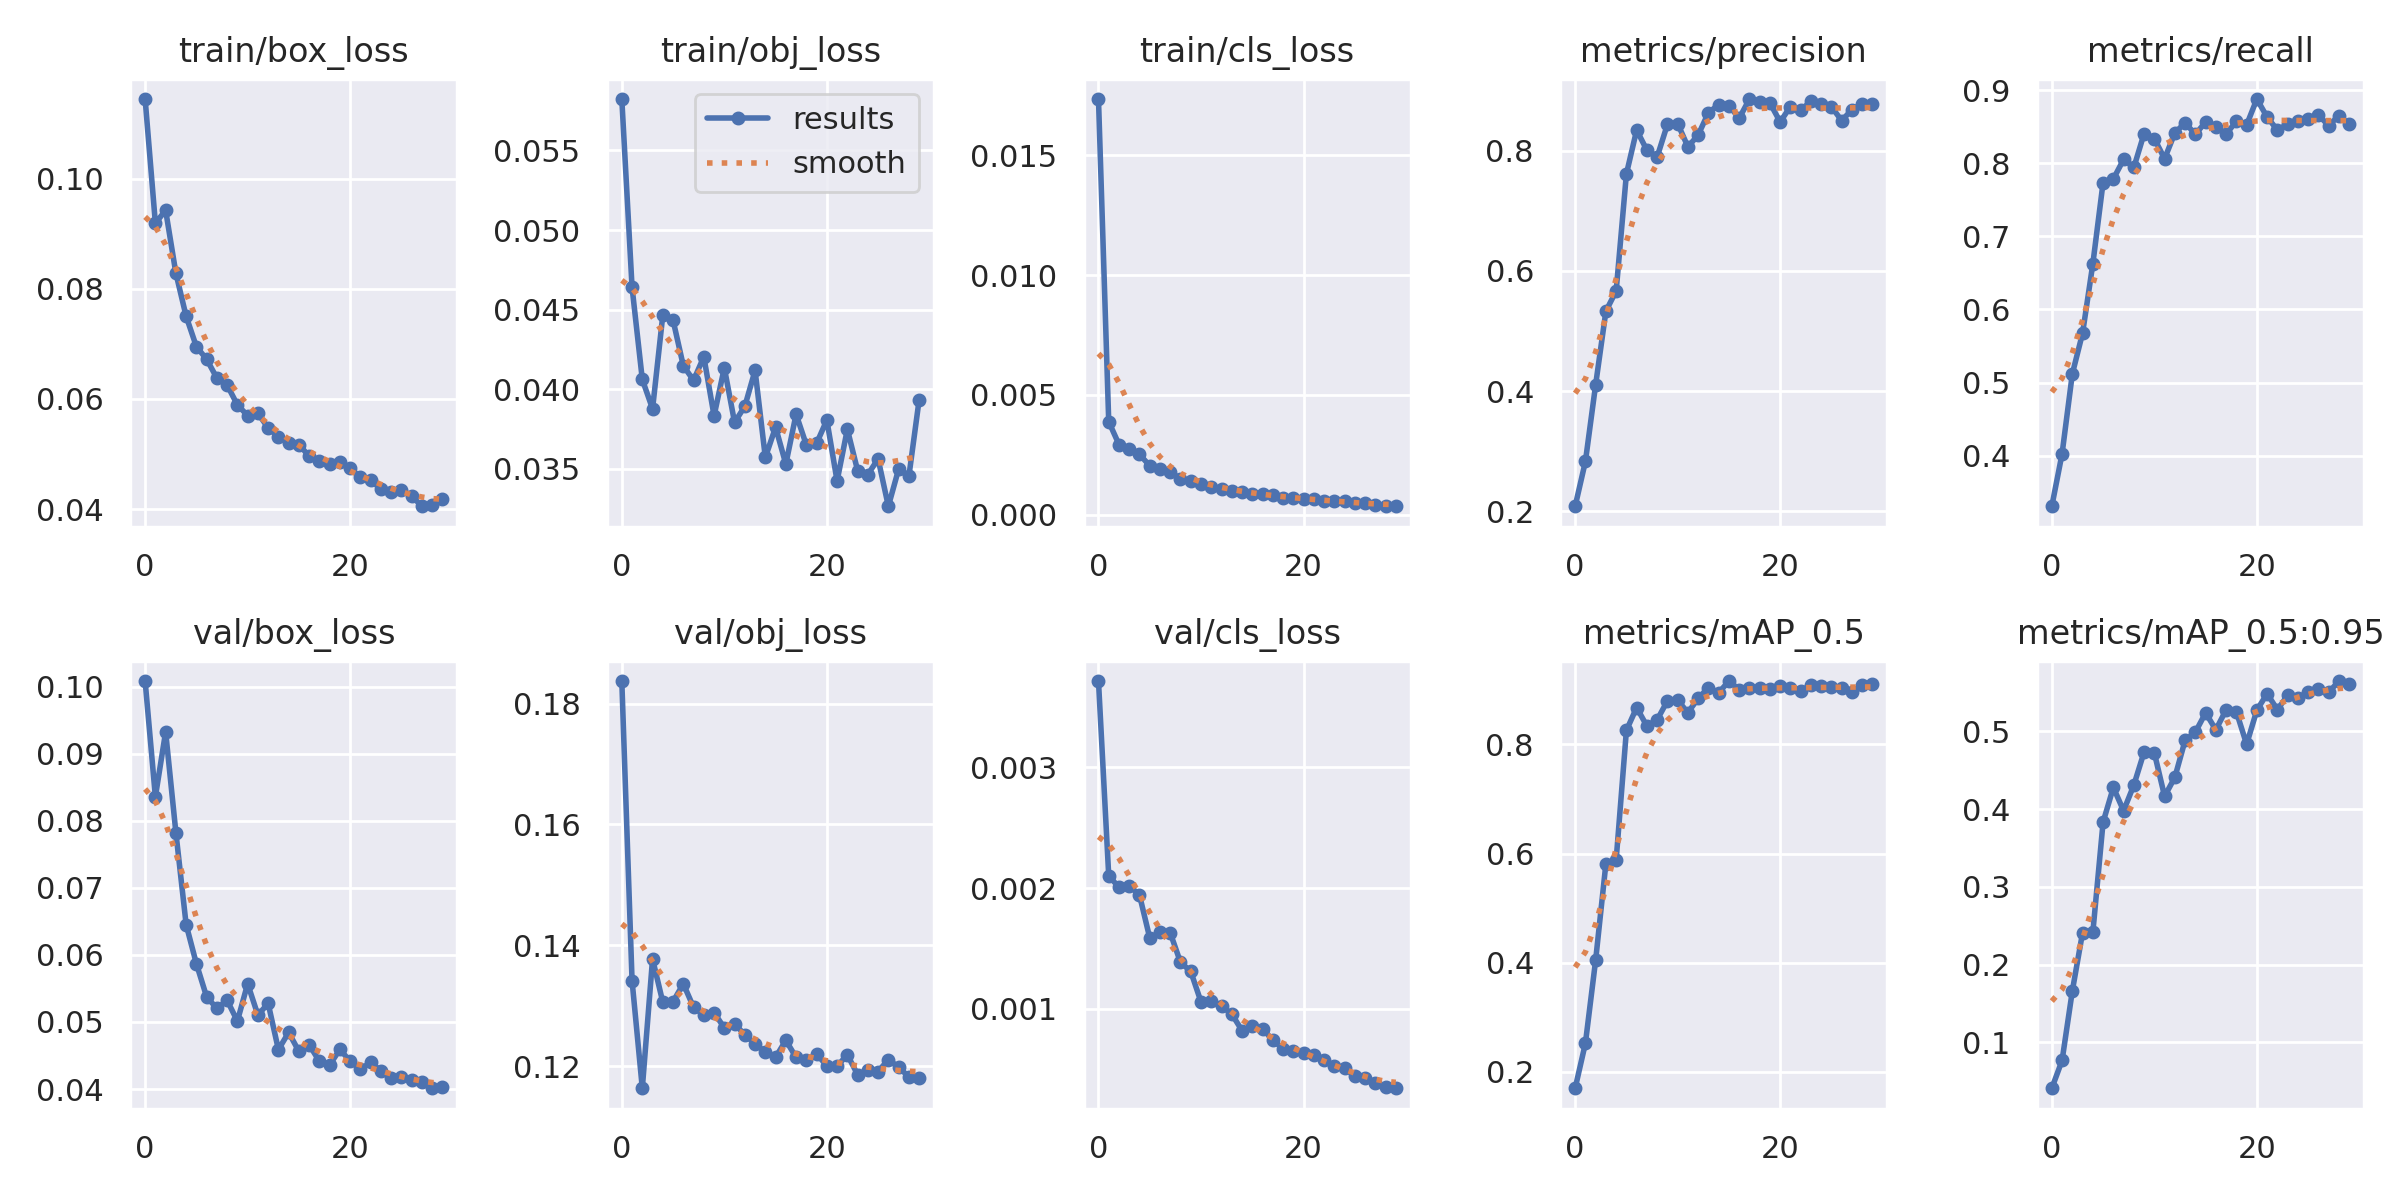

In [ ]:
import os, glob
from IPython.display import Image, display

# Base YOLOv5 runs directory
runs_dir = '/content/yolov5/runs/train'

# Glob all your aerial_threat_detection runs, sorted by modification time
exp_dirs = sorted(
    glob.glob(os.path.join(runs_dir, 'aerial_threat_detection*')),
    key=os.path.getmtime
)

if not exp_dirs:
    raise FileNotFoundError(f"No folders matching 'aerial_threat_detection*' in {runs_dir}")

latest_run = exp_dirs[-1]
img_path   = os.path.join(latest_run, 'results.png')

# Display it
display(Image(filename=img_path))

In [ ]:
%cd /content/yolov5

!python detect.py \
  --weights runs/train/aerial_threat_detection/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/dataset/train/images \
  --data /content/dataset/data.yaml \
  --project runs/detect \
  --name aerial_threat_results8 \
  --exist-ok


/content/yolov5
detect: weights=['runs/train/aerial_threat_detection/weights/best.pt'], source=/content/dataset/train/images, data=/content/dataset/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=aerial_threat_results8, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/527 /content/dataset/train/images/-4K-1_-Av335688642-P1-_mp4-0000_jpg.rf.ef3a955f4e05899b42ffc74fbfc469b6.jpg: 640x640 67 soldiers, 27.0ms
image 2/527 /content/dataset/train/images/-4K-1_-Av335688642-P1-_mp4-0002_jpg.rf.b384bfe7e3

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/aerial_threat_results8/*.jpg'):
    display(Image(filename=image_path))

In [ ]:
import glob
glob.glob('/content/yolov5/runs/detect/combined_video_results/*.mp4')

[]

In [ ]:
!python detect.py \
  --weights runs/train/aerial_threat_detection/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/video.mp4 \
  --data /content/dataset/data.yaml \
  --project runs/detect \
  --name combined_video_results \
  --exist-ok

detect: weights=['runs/train/aerial_threat_detection/weights/best.pt'], source=/content/video.mp4, data=/content/dataset/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=combined_video_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/297) /content/video.mp4: 384x640 168 soldiers, 47.2ms
video 1/1 (2/297) /content/video.mp4: 384x640 162 soldiers, 19.7ms
video 1/1 (3/297) /content/video.mp4: 384x640 165 soldiers, 19.7ms
video 1/1 (4/297) /content/video.mp4: 384x640 172 soldiers, 19.7

In [ ]:
!python detect.py \
  --weights runs/train/aerial_threat_detection/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/video1.mp4 \
  --data /content/dataset/data.yaml \
  --project runs/detect \
  --name combined_video_results \
  --exist-ok

detect: weights=['runs/train/aerial_threat_detection/weights/best.pt'], source=/content/video1.mp4, data=/content/dataset/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=combined_video_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/320) /content/video1.mp4: 384x640 (no detections), 47.3ms
video 1/1 (2/320) /content/video1.mp4: 384x640 (no detections), 19.7ms
video 1/1 (3/320) /content/video1.mp4: 384x640 (no detections), 19.6ms
video 1/1 (4/320) /content/video1.mp4: 384x640 (no 

In [ ]:
#ERROR

from IPython.display import Video, display

video_paths = [
    '/content/yolov5/runs/detect/combined_video_results/video1.mp4',
    '/content/yolov5/runs/detect/combined_video_results/video.mp4'
]

for path in video_paths:
    display(Video(path, embed=True))

In [ ]:
!ffmpeg -i /content/yolov5/runs/detect/combined_video_results/video1.mp4 -c:v libx264 -preset fast -crf 22 /content/video1_converted.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffmpeg -i /content/yolov5/runs/detect/combined_video_results/video.mp4 -c:v libx264 -preset fast -crf 22 /content/video_converted.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import Video
Video("/content/video1_converted.mp4", embed=True)

In [ ]:
!gdown --id "1fvtTXHlKg1BXLozpjcbbKR-EysZ5iRw-"

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1fvtTXHlKg1BXLozpjcbbKR-EysZ5iRw-

but Gdown can't. Please check connections and permissions.


In [ ]:
video1 = "/content/video_converted.mp4"
video2 = "/content/video1_converted.mp4"

from IPython.display import Video, display
display(Video(video1, embed=True))
display(Video(video2, embed=True))